<a href="https://colab.research.google.com/github/i2mmmmm/kaggle_flood/blob/main/1.EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Kaggle --upgrade

In [1]:
import os
os.environ['KAGGLE_USERNAME']='mmmmmlee'
os.environ['KAGGLE_KEY']='b4527f98e27813c6dae3fb199096dcb5'

In [ ]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...

options:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        kernels {list, files, init, push, pull, output, status}
                        models {instances, get, list, init, create, delete, update}
                        models instances {versions, get, files, init, create, delete, update}
                        models instances versions {init, create, download, delete, files}
                        config {view, set, unset}
    competitions (c)    Commands related to Kaggle competitions
    datasets (d

In [2]:
!kaggle competitions download -c Playground-series-s4e5

 50% 14.0M/28.0M [00:00<00:00, 146MB/s]
100% 28.0M/28.0M [00:00<00:00, 167MB/s]


In [3]:
!unzip 'Playground-series-s4e5.zip'

Archive:  Playground-series-s4e5.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

EDA

In [6]:
train['FloodProbability'].describe()

count    1.117957e+06
mean     5.044803e-01
std      5.102610e-02
min      2.850000e-01
25%      4.700000e-01
50%      5.050000e-01
75%      5.400000e-01
max      7.250000e-01
Name: FloodProbability, dtype: float64

In [7]:
train.dtypes

id                                   int64
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [8]:
train.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [9]:
test.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

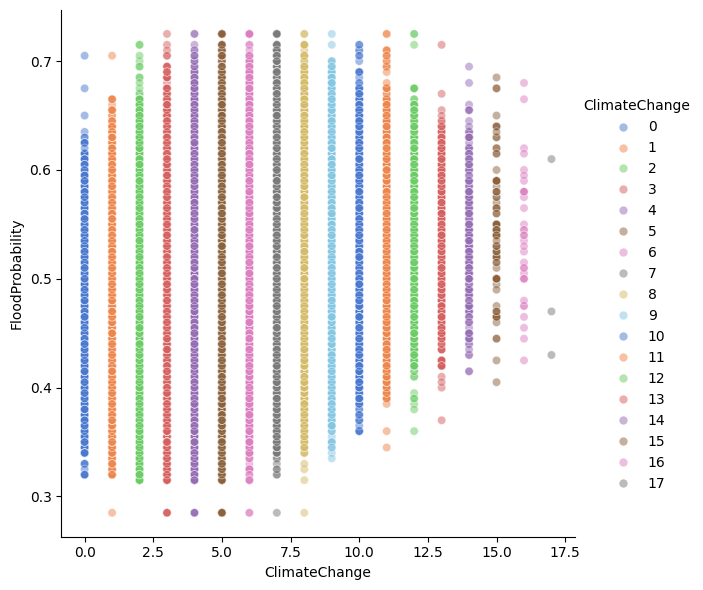

In [ ]:
# plot a graph
sns.relplot(x="ClimateChange", y="FloodProbability",
            sizes=(40, 400), alpha=.5, hue = "ClimateChange", palette="muted",
            height=6, data=train)

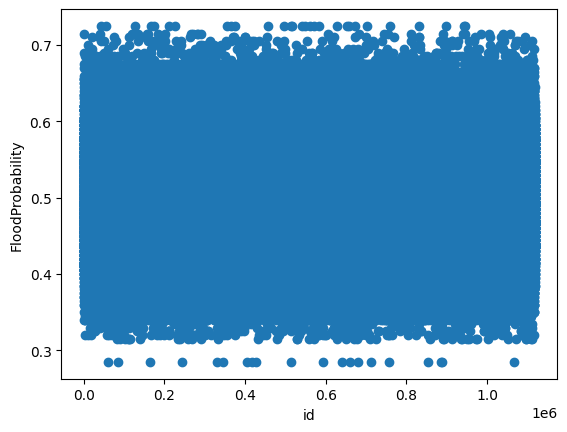

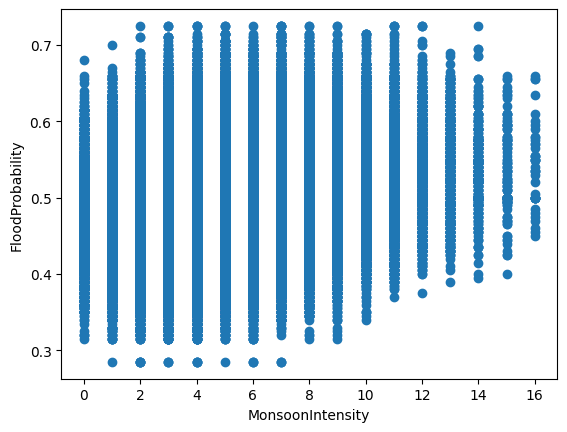

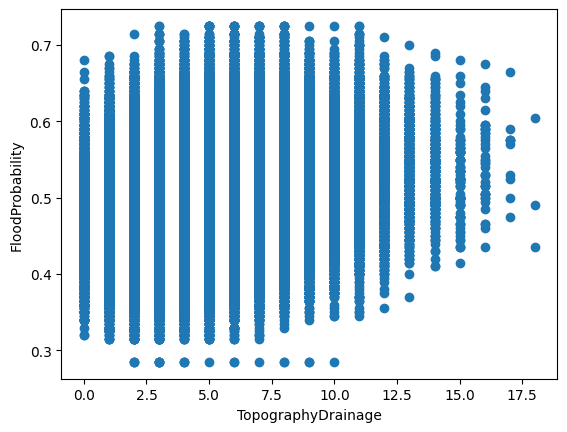

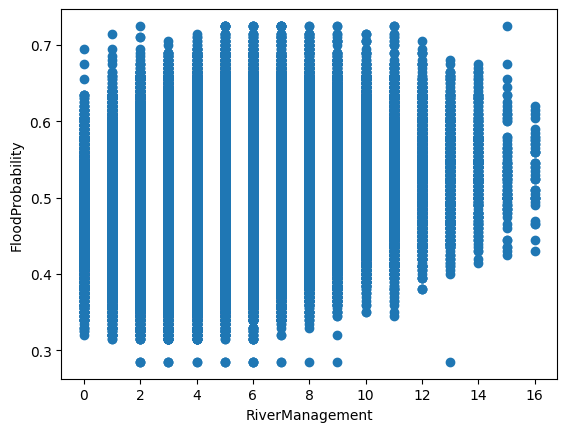

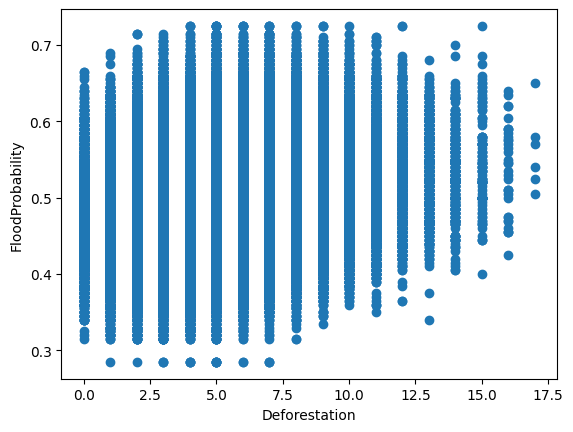

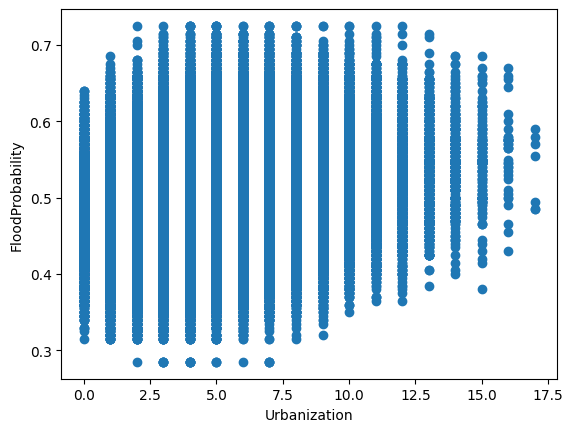

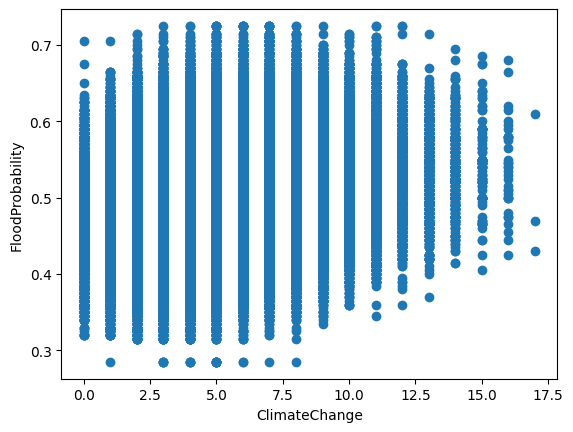

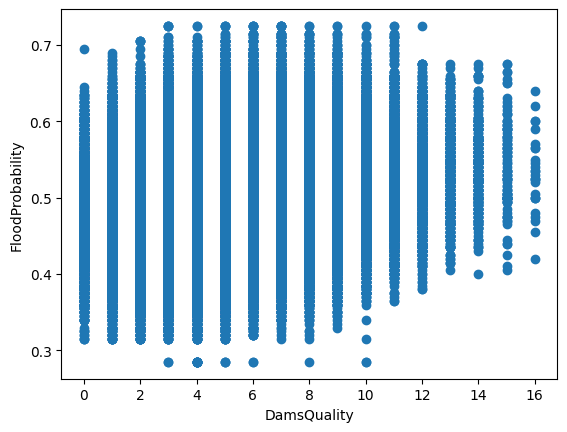

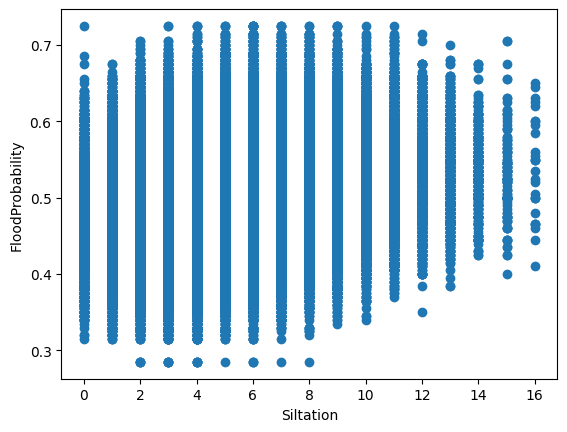

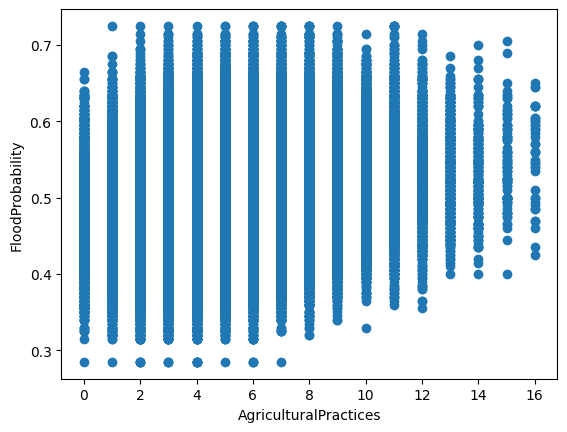

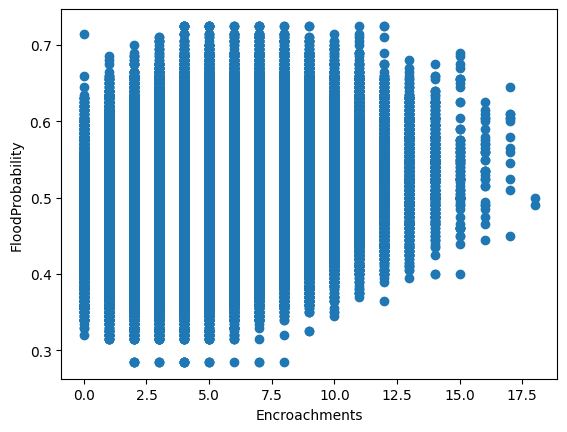

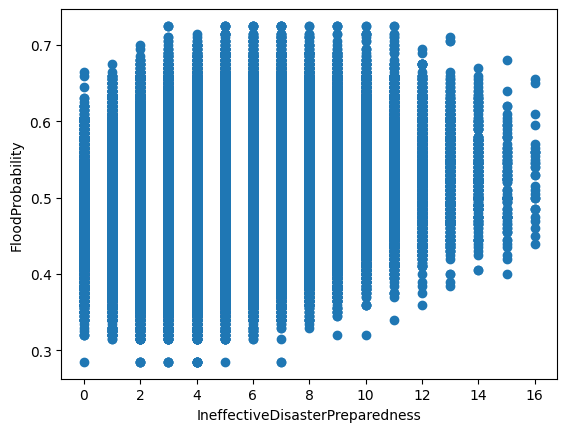

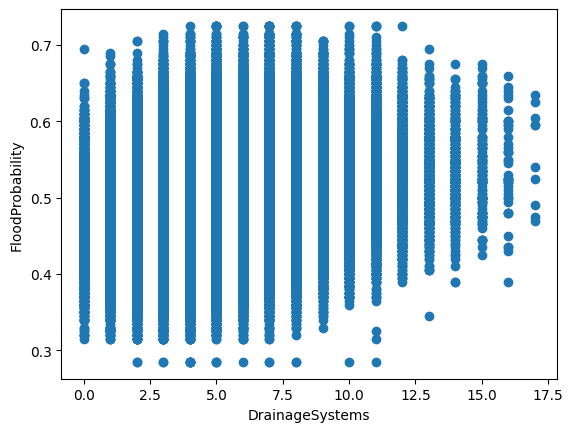

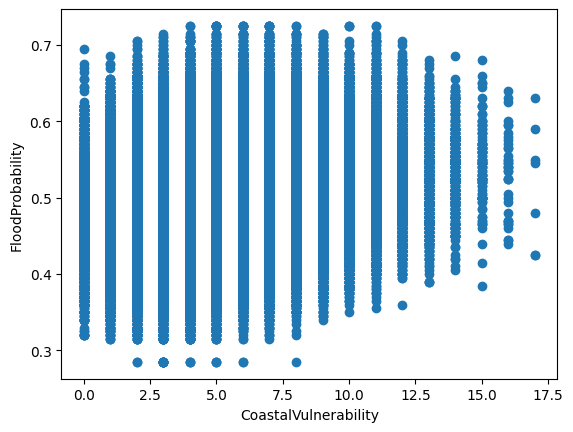

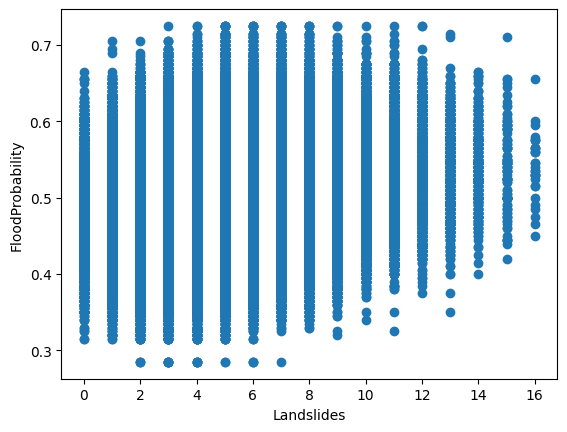

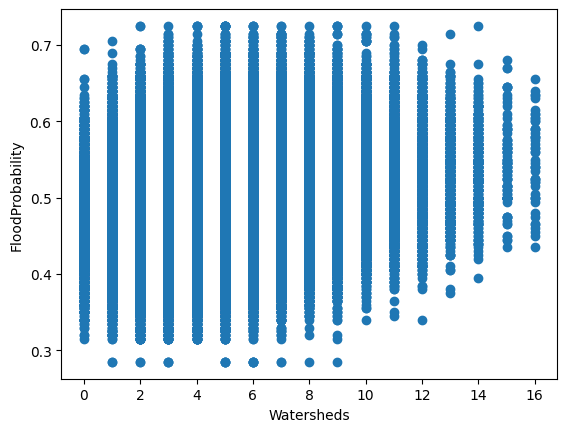

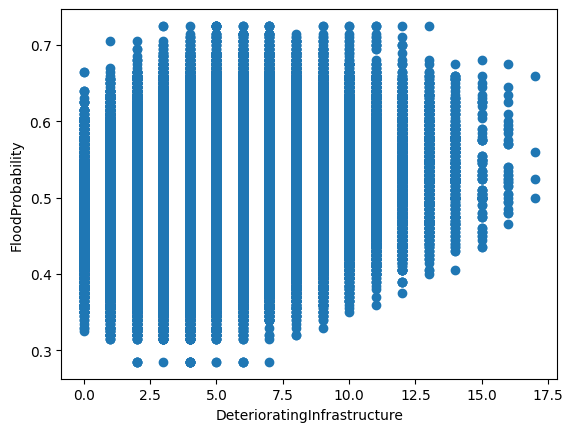

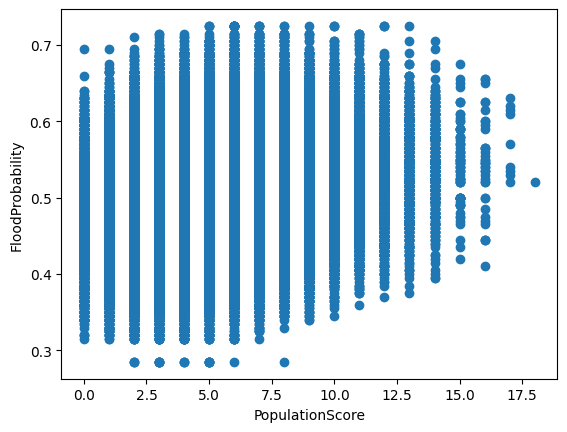

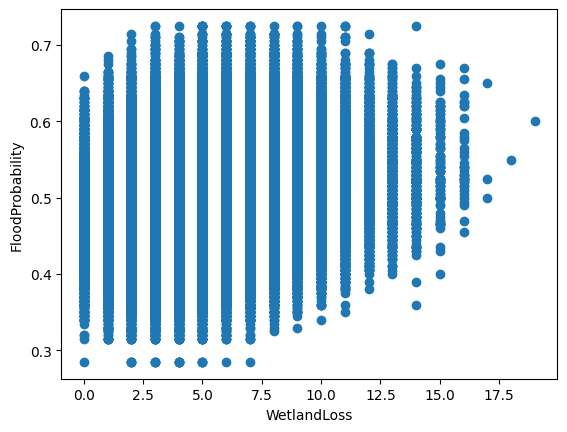

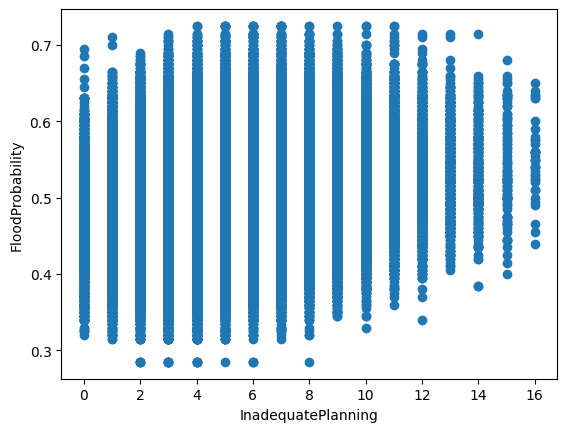

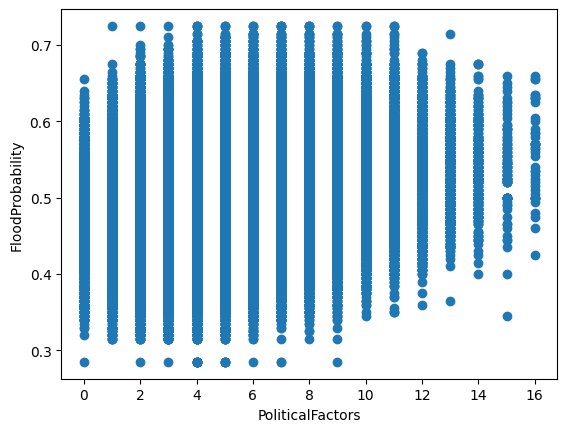

In [11]:
for feature in train.columns[:-1]:
    plt.scatter(train[feature], train['FloodProbability'])
    plt.xlabel(feature)
    plt.ylabel('FloodProbability')
    plt.show()

                 id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
count  1.117957e+06      1.117957e+06        1.117957e+06     1.117957e+06   
mean   5.589780e+05      4.921450e+00        4.926671e+00     4.955322e+00   
std    3.227265e+05      2.056387e+00        2.093879e+00     2.072186e+00   
min    0.000000e+00      0.000000e+00        0.000000e+00     0.000000e+00   
25%    2.794890e+05      3.000000e+00        3.000000e+00     4.000000e+00   
50%    5.589780e+05      5.000000e+00        5.000000e+00     5.000000e+00   
75%    8.384670e+05      6.000000e+00        6.000000e+00     6.000000e+00   
max    1.117956e+06      1.600000e+01        1.800000e+01     1.600000e+01   

       Deforestation  Urbanization  ClimateChange   DamsQuality     Siltation  \
count   1.117957e+06  1.117957e+06   1.117957e+06  1.117957e+06  1.117957e+06   
mean    4.942240e+00  4.942517e+00   4.934093e+00  4.955878e+00  4.927791e+00   
std     2.051689e+00  2.083391e+00   2.057742e+00  2.0

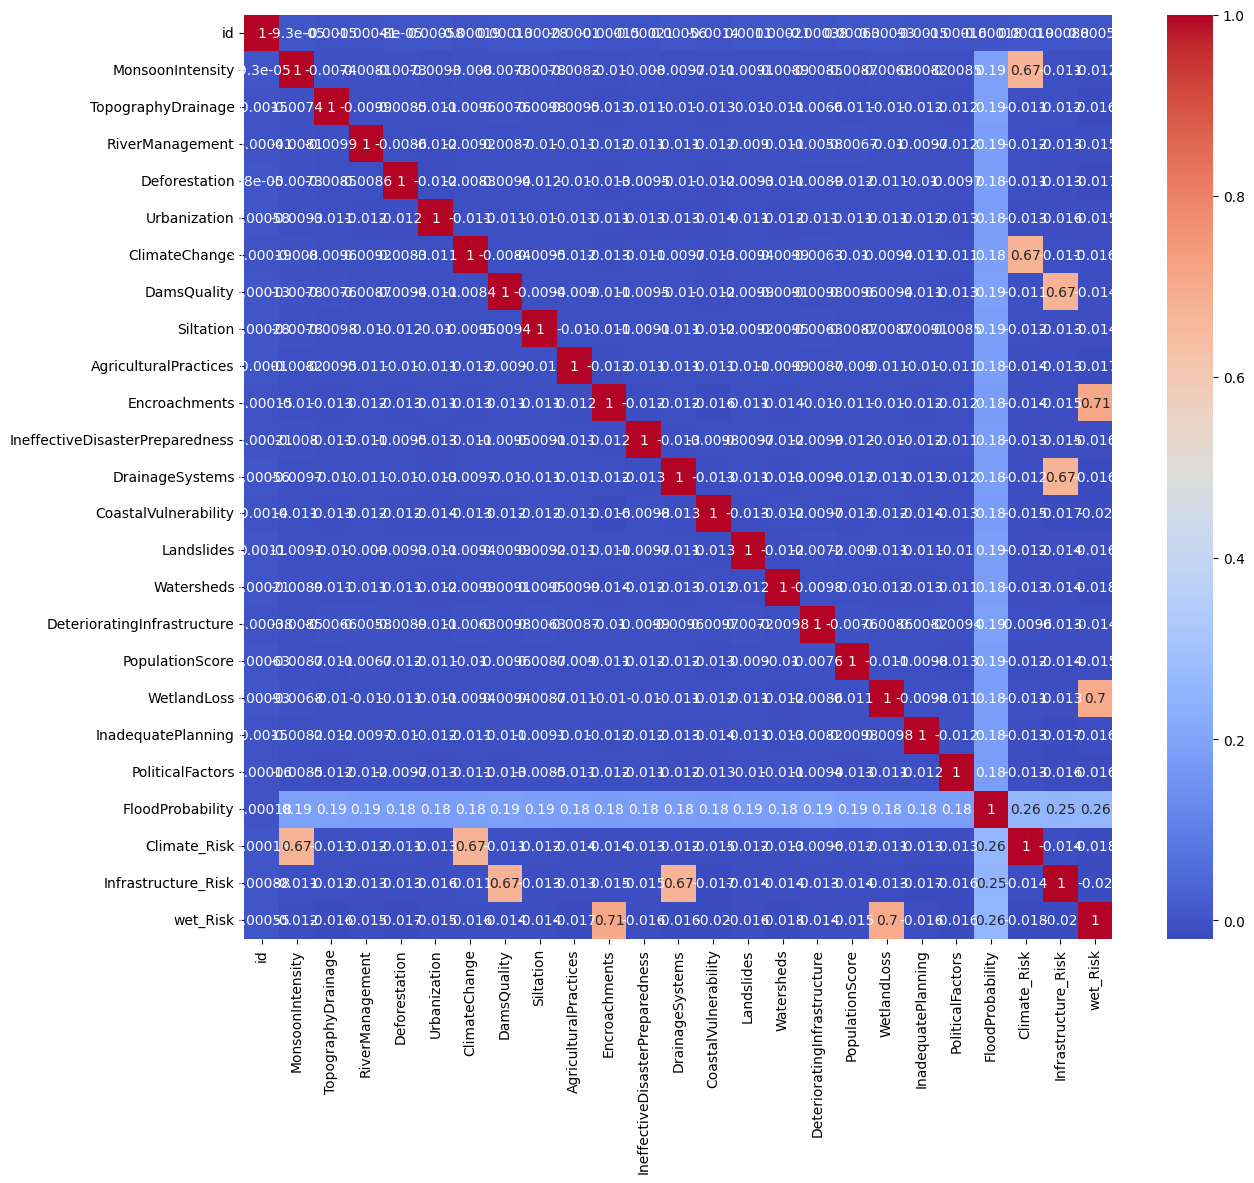

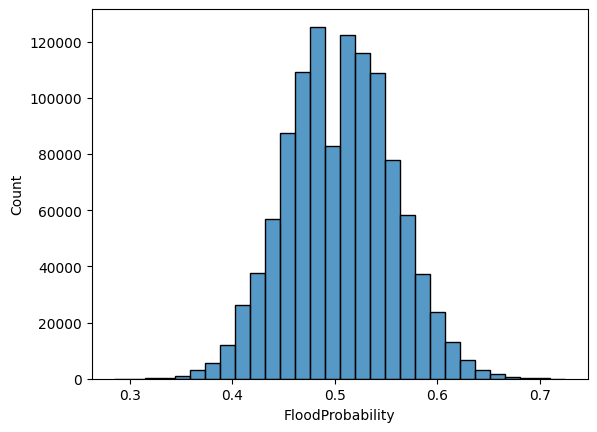

In [47]:
# 기술 통계
print(train.describe())

# 상관 행렬 시각화
corr_matrix = train.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# FloodProbability 히스토그램
sns.histplot(train['FloodProbability'], bins=30)
plt.show()

전처리

In [43]:
# 표준화
train = pd.read_csv('train.csv')
scaler = StandardScaler()
X = train.drop(columns=['FloodProbability', 'id'])
y = train['FloodProbability']
X_scaled = scaler.fit_transform(X)

In [44]:
# 선형회귀

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=35)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

R2 Score: 0.8449835489068076
MSE: 0.00040395088979260915


In [45]:
train['Climate_Risk'] = train['MonsoonIntensity'] * train['ClimateChange']
train['Infrastructure_Risk'] = train['DamsQuality'] * train['DrainageSystems']
train['wet_Risk'] = train['WetlandLoss'] + train['Encroachments']

In [46]:
scaler = StandardScaler()
X = train.drop(columns=['FloodProbability', 'id'])
y = train['FloodProbability']
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=35)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

R2 Score: 0.8449901321915165
MSE: 0.00040393373468618546


In [ ]:
# 표준화 (test flood 예측 진행)

X_train = train.drop(columns=['FloodProbability', 'id'])
y_train = train['FloodProbability']
X_test = test.drop(columns=['id'])

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 모델 학습
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# 예측
y_pred_lr = model_lr.predict(X_test_scaled)

# 결과 출력
test['FloodProbability'] = y_pred_lr
print(test[['id', 'FloodProbability']])

             id  FloodProbability
0       1117957          0.573615
1       1117958          0.455243
2       1117959          0.454742
3       1117960          0.466204
4       1117961          0.466068
...         ...               ...
745300  1863257          0.477227
745301  1863258          0.449369
745302  1863259          0.624330
745303  1863260          0.550925
745304  1863261          0.511472

[745305 rows x 2 columns]


In [ ]:
# 출력
test[['id', 'FloodProbability']].to_csv('submission.csv', index=False)

# 첫번째 제출 baseline 0.84458

In [ ]:
sample_submission

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5
...,...,...
745300,1863257,0.5
745301,1863258,0.5
745302,1863259,0.5
745303,1863260,0.5
